## Pixel-wise Decomposition as a General Concept

The overall idea of pixel-wise decomposition is to understand the contribution of a single pixel of an image $x$ to the prediction $f(x)$ made by a classifier $f$ in an image classification task. We would like to find out, separately for each image $x$, which pixels contribute to what extent a positive or negative classification result. Furthermore, we want to express this extent quantitatively as a measure. We assume that the classifer has real-valued outputs which are thresholded at zero. Then the classifier can be represented as a mapping $f : \mathbb{R}^V \rightarrow \mathbb{R}^1$ where $f(x) > 0$ means that the object it has been trained to recognize exists in the input image $x$. One possible way is to decompose the prediction $f(x)$ as a sum of terms $R_d$ that each indicates how much contribution a pixel $x_d$ has had on the final decision:

\begin{equation}
f(x) \approx \sum^V_{d=1} R_d
\end{equation}

$R_d$ can be thought of as a function that takes in a pixel value as an argument and returns a scalar value which indicates how much positive or negative contribution that pixel has had on $f(x)$. Therefore, $R_d < 0$ contributes evidence against the presense of the object it had been trained to recognize, while $R_d > 0$ contributes evidence for its presense. If $R_d$ is nonnegative, then $R_d = 0$ indicates no contribution and $R_d > 0$ positive contribution. This is one basic constraint of relevance $R_d$. I will restate it formally so we may refer back to it later:

$$\textbf{Constraint 1.} \ R_d > 0 \ \text{should indicate positive contribution and} \ R_d < 0 \ \text{negative contribution.}$$

## Layer-wise Relevance Propagation

We will introduce layer-wise relevance propagation (LRP) as a concept defined by a set of constraints. Any solution satisfying the constraints will be considered to follow the concept of layer-wise relevance propagation.

As its name implies, LRP makes explicit use of the feed-forward graph structure of a DNN. The first layer are the inputs, the pixels of the image, and the last layer is the real-valued prediction output of the classifier $f$. The $l$th layer is modeled as a vector of pre-activations $z = (z^{(l)}_d)^{V(l)}_{d = 1}$ with dimensionality $V(l)$. That is, $z = (z^{(l)}_1, z^{(l)}_2, z^{(l)}_3, ..., z^{(l)}_{V(l)})$ where $V(l)$ is the number of nodes/neurons in the $l$th layer. LRP assumes that we have a Relevance score $R^{(l+1)}_d$ for each pre-activation $z^{(l+1)}_d$ of the vector $z$ at layer $l + 1$. The idea is to find a Relevance score $R^{(l)}_d$ for each dimension $z^{(l+1)}_d$ of the vector $z$ at the next layer $l$ which is close to the input layer such that the following holds:

\begin{equation}
f(x) = \cdots = \sum_{d = 1}^{V(l+1)} R^{(l+1)}_d = \sum_{d = 1}^{V(l)} R^{(l)}_d = \cdots = \sum_{d = 1}^{V(1)} R^{(1)}_d
\end{equation}

I will restate the above equation as the second constraint:

$$\textbf{Constraint 2. } \text{Total Relevance must be constant throughout layers i.e., Relevance is conserved.}$$

Iterating *Eq (2)* from the last layer which is the classifier output $f(x)$ down to the input layer $x$ consisting of image pixels yields the desired *Eq (1)*. That is, we propagate the Relevance scores through the layers and therefore, it is named layer-wise relevance propagation.

However, an LRP satisfying just the condition *Eq (2)* may not yield a meaningful interpretation of the classifier prediction. Let us look at a simple example: a linear classifier with some arbitrary and dimension-specific feature space mapping $\phi_d$ and a bias $b$:

\begin{equation}
f(x) = b + \sum_d \alpha_d \phi_d(x_d)
\end{equation}

Let us define the relevance for the second layer trivially as $R^{(1)}_d = f(x)$. Then, one possible layer-wise relevance propagation formula would be to define the relevance $R^{(1)}$ of the inputs as:

\begin{equation}
f(x) = 
\begin{cases}
\displaystyle f(x) \frac{\left| \alpha_d \phi_d (x_d) \right|}{\sum_d \left| \alpha_d \phi_d (x_d) \right|} & \text{if} \ \sum_d \left| \alpha_d \phi_d (x_d) \right| \neq 0 \\
\displaystyle \frac{b}{V} &  \text{if} \ \sum_d \left| \alpha_d \phi_d (x_d) \right| = 0
\end{cases}
\end{equation}

However, this LRP contradicts Constraint (1) stated in the first section. All Relevances $R^{(1)}_d$ have the same sign as the prediction $f(x)$ and consequently indicate positive contributions if $f(x) > 0$ and negative contributions if $f(x) < 0$. Such interpretation does not offer much information about the decision of the classifier.

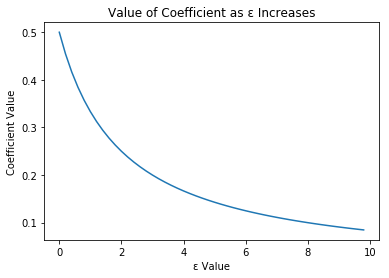

In [6]:
t = np.arange(0., 10., 0.2)

fig = plt.figure()
ax = fig.add_subplot(111, title='Value of Coefficient as ε Increases', xlabel='ε Value', ylabel='Coefficient Value')
ax.plot(t, 1 - (1 + t) / (2 + t))

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

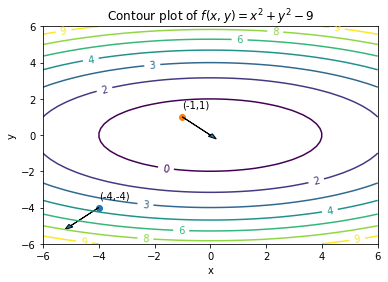

In [29]:
x = np.linspace(-6., 6., 50)
y = np.linspace(-6., 6., 50)
X, Y = np.meshgrid(x, y)

def f(x, y):
    return (x ** 2) / 16 + (y ** 2) / 4 - 1

Z = f(X, Y)

cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True, fontsize=10, fmt='%1.0f')
plt.title(r'Contour plot of $f(x,y) = x^2 + y^2 - 9$')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(-4, -4)
plt.scatter(-1, 1)
plt.text(-4, -3.5, '(-4,-4)')
plt.text(-1, 1.5, '(-1,1)')
plt.arrow(-1, 1, 1, -1, head_width=0.2)
plt.arrow(-4, -4, -1, -1, head_width=0.2)

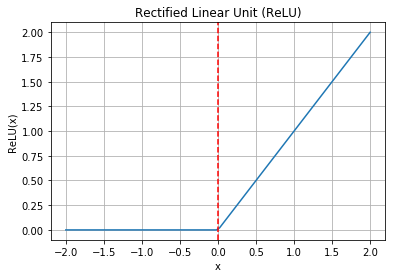

In [34]:
def relu(x):
    if x < 0:
        return 0
    else:
        return x

x = np.linspace(-2., 2., 100)
y = []

for i in range(len(x)):
    y.append(relu(x[i]))

ax = plt.subplot(111)
ax.plot(x,np.array(y))
ax.axvline(x=0, color='r', linestyle='--', linewidth=1.5)
ax.grid()
ax.set_title('Rectified Linear Unit (ReLU)')
ax.set_xlabel('x')
ax.set_ylabel('ReLU(x)')